<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-visualization-in-python" data-toc-modified-id="Data-visualization-in-python-1">Data visualization in python</a></span><ul class="toc-item"><li><span><a href="#How-to-visualize-data-and-make-everyone-hate-you" data-toc-modified-id="How-to-visualize-data-and-make-everyone-hate-you-1.1">How to visualize data and make everyone hate you</a></span></li></ul></li><li><span><a href="#Video-Game-Sales-and-Ratings" data-toc-modified-id="Video-Game-Sales-and-Ratings-2">Video Game Sales and Ratings</a></span><ul class="toc-item"><li><span><a href="#1.-We-study-the-basics-of-matplotlib-using-the-example-of-linear-graphs" data-toc-modified-id="1.-We-study-the-basics-of-matplotlib-using-the-example-of-linear-graphs-2.1">1. We study the basics of matplotlib using the example of linear graphs</a></span><ul class="toc-item"><li><span><a href="#Task-#1:" data-toc-modified-id="Task-#1:-2.1.1">Task #1:</a></span></li><li><span><a href="#Creating-a-graph-system" data-toc-modified-id="Creating-a-graph-system-2.1.2">Creating a graph system</a></span></li><li><span><a href="#Task-#2:" data-toc-modified-id="Task-#2:-2.1.3">Task #2:</a></span></li></ul></li><li><span><a href="#2.-Graphs-for-categorical-variables" data-toc-modified-id="2.-Graphs-for-categorical-variables-2.2">2. Graphs for categorical variables</a></span><ul class="toc-item"><li><span><a href="#Task-#3:" data-toc-modified-id="Task-#3:-2.2.1">Task #3:</a></span></li><li><span><a href="#Task-#4:" data-toc-modified-id="Task-#4:-2.2.2">Task #4:</a></span></li><li><span><a href="#Task-#5:" data-toc-modified-id="Task-#5:-2.2.3">Task #5:</a></span></li></ul></li><li><span><a href="#3*.-Multivariate-scattering-graph" data-toc-modified-id="3*.-Multivariate-scattering-graph-2.3">3*. Multivariate scattering graph</a></span></li></ul></li></ul></div>

# Data visualization in python 

<center>
<img src="https://github.com/hse-econ-data-science/dap_2021_spring/blob/main/sem10_visual/images/visual.png?raw=true" height="400" width="700">
</center>

Visualization takes an important part in data analysis. By presenting information in a graphical form, you facilitate the process of its perception, which makes it possible to identify additional patterns, evaluate the ratios of quantities, and communicate key aspects in the data faster.

Let's start with a small "memo", which should always be remembered when creating any charts.

## How to visualize data and make everyone hate you 

1. The title of the chart is for weaklings. According to the schedule, it is always clear what data and phenomena it describes.
2. In no case do not sign any axis of the chart. Let the viewer develop his intuition!
3. Units of measurement are not required at all. What is the difference in what the quantity was measured - in people or in liters!
4. The smaller the font on the graph, the sharper the viewer's vision.
5. On one chart, you need to try to fit all the information that you have in the dataset. With full names, transcripts, footnotes. The more text - the more informative!
6. Use 3D and special effects whenever possible, let them know that you are a born designer. In addition, this way there will be less visual distortion.

Seriously, be sure to look at the list of recommended materials at the end of the notebook on the rules for drawing graphs and working with libraries for data visualization in Python.  

The main libraries for visualization in Python are 'matplotlib`` 'seaborn', 'plotly'. Today we will get acquainted with the first two

In [1]:
import numpy as np # library for matrices and mathematics
import pandas as pd # library for working with tables

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # graph style
%matplotlib inline

# Video Game Sales and Ratings

We work with a dataset for sales and evaluation of video games. The dataset is taken from [Keggle](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings ).

__ Column Description:__
* `Name' $-$ name of the video game
* 'Platform' $-$ the platform on which the game was launched
* `year_of_release' $-$ year of release
* 'Genre' $-$ genre
* 'Publisher' $-$ publisher
* `NA_Sales` $-$ sales in North America (in million units)
* `EU_Sales` $-$ sales in the European Union (in million units)
* `JP_Sales` $-$ sales in Japan (in million units)
* `Other_Sales` $-$ sales in the rest of the world (in million units)
* 'Global_sales' $-$ total sales (in millions of units)
* 'critic_score' $-$ cumulative score compiled by Metacritic staff
* 'critic_count' $-$ number of critics rated the game
* 'user_score' $-$ cumulative score compiled by Metacritic subscribers (users)
* 'user_count' $-$ the number of users rated the game
* 'Developer' $-$ responsible for creating the game
* 'Rating' $-$ rating (Everyone, Teen, Adults Only, etc.)

In [2]:
df = pd.read_csv('data/video_games_sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


There are a lot of omissions in the data, so let's throw out all the missed observations. We also see that some of the pandas columns are of the wrong type. Let's fix it:

In [4]:
df = df.dropna()

df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [5]:
df.shape

(6825, 16)

## 1. We study the basics of matplotlib using the example of linear graphs

The simplest way to create a graph in matplotlib is the `plt.plot()' function, to which we pass two arguments - what to put on the _x_ axis and what on _y_. If you have variables in numeric format, then you will get a line plot without any problems

`plt.plot(x = ___, y = ___)`

**Let's look at the dynamics of game sales in the world by year:**

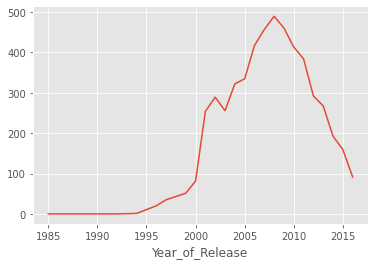

In [6]:
# aggregating data for the year
gb = df.groupby('Year_of_Release').Global_Sales.sum()

# plotting
gb.plot();

### Task #1:
Build one chart on which all sales indicators will be displayed at once (Na_sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales)

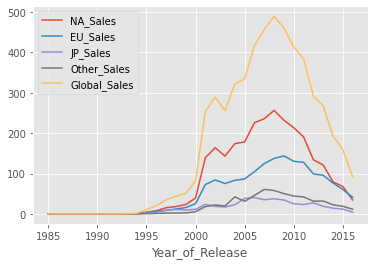

In [7]:
## Your code

sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
gb = sales_df.groupby('Year_of_Release').sum()


# Draw!
gb.plot();

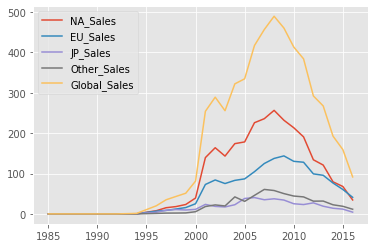

In [8]:
### ### Via plot.plot():
gb = gb.reset_index()

plt.plot(gb.Year_of_Release, gb.NA_Sales, label = 'NA_Sales')
plt.plot(gb.Year_of_Release, gb.EU_Sales, label = 'EU_Sales')
plt.plot(gb.Year_of_Release, gb.JP_Sales, label = 'JP_Sales')
plt.plot(gb.Year_of_Release, gb.Other_Sales, label = 'Other_Sales')
plt.plot(gb.Year_of_Release, gb.Global_Sales, label = 'Global_Sales')

plt.legend();

In an ideal universe, we create graphs with the `subplots' function, which generates our graph into 2 variables (usually called fig and ax):

* 'fig` is responsible for the graph as a whole. Think of it as a file that stores a graph as a picture.
* 'ax' $-$ is the coordinate axis on which we actually plot the graph. All the elements of the graph are stored just in it.

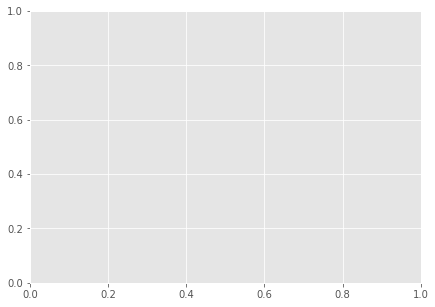

In [9]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # created a canvas for a graph of 1 row and 1 column (1 graph)
# figsize is the size of our rectangle in non-obvious units. 
                                           # Which size is successful? experiment!

**Let's look at the dynamics of game sales in the world by year, but now we use 'subplots`**

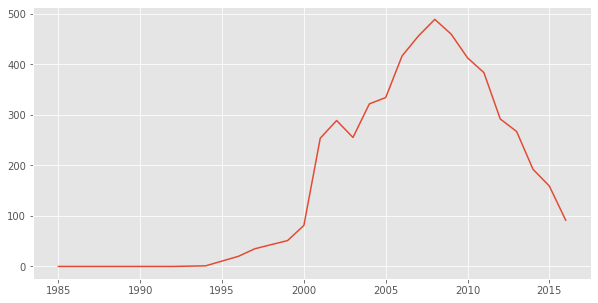

In [10]:
# aggregating data for the year
gb = df.groupby('Year_of_Release').Global_Sales.sum()

# plotting
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(gb.index, gb.values);

The _ax_ variable actually contains a bunch of methods that allow you to make the graph more pleasant. Let's look at a few of them:

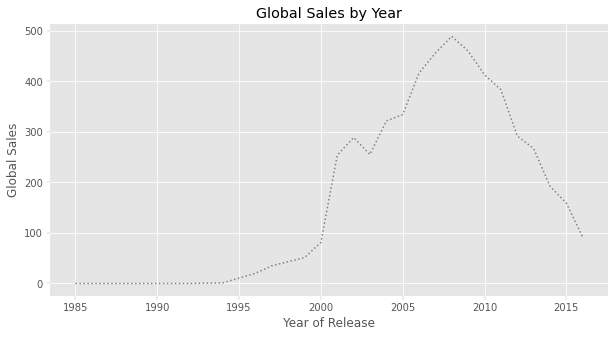

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 

# we define the parameters of the graph itself (line color, style, etc.) as parameters in the plot() method
# we change the color and style of the line to a dotted line. Matplotlib knows some standard colors, and they can be set directly with a word
# you can also pass hex color. For example, #8c92ac
ax.plot(gb.index, gb.values, color = 'grey', ls = ':')  


# if you noticed, then in our very first chart, the scale broke down over the years and became float. Matplotlib forced 
# makes x a continuous variable for a line graph. We want to leave the year scale in integers.
ax.locator_params(integer=True) 

# we call the scales x and y, choose the font size.
ax.set_xlabel('Year of Release', fontsize=12)
ax.set_ylabel('Global Sales', fontsize=12)

# making the right and upper borders of the graph invisible
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# making serifs on the x and y scales thinner
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# we reduce the thickness of the left borders of the graph using a loop 
# (it is possible without a loop with a separate line for each border, as we did above)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)
    
plt.title('Global Sales by Year')
    
# fig.savefig('mlds.png')

plt.show()

###  Creating a graph system

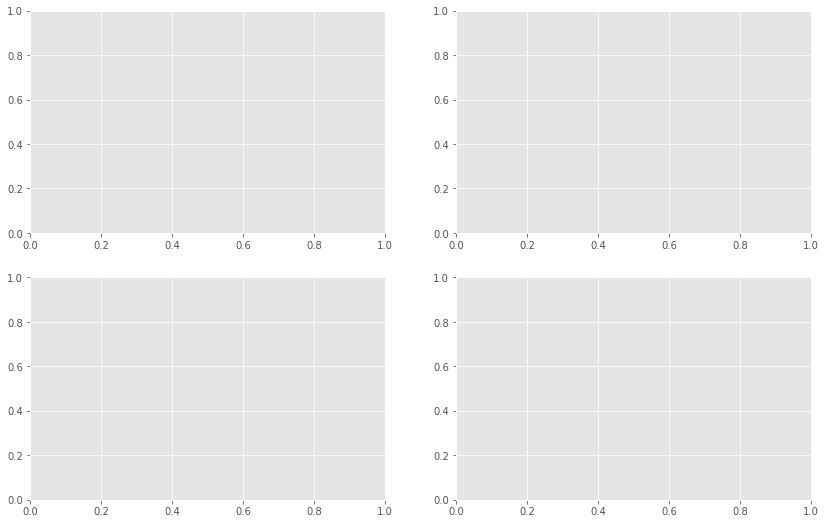

In [12]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) # increasing the number of objects to two rows and two columns.

Now we have four charts! 

The object _ax_ in this case ** becomes a matrix**. And to access each graph, you need to access it by the index from _ax_.

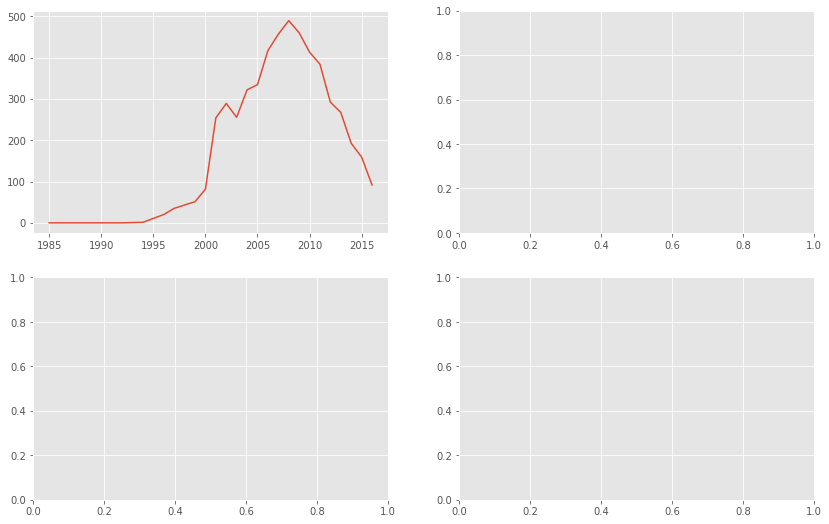

In [13]:
fig, ax = plt.subplots(2,2, figsize=(14,9))

ax[0][0].plot(gb.index, gb.values);

Below we will see how using the for loop you can apply some modification to all the graphs of the system.

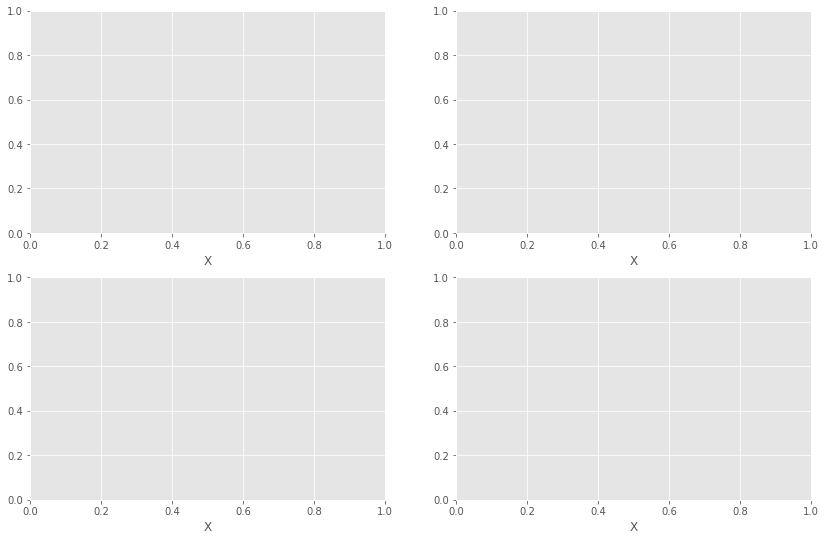

In [14]:
fig, ax= plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('X')

### Task #2:

Create a graph system that has:
* the 1st chart shows sales in North America ('na_sales`);
* on the 2nd sale in the European Union ('eu_sales`);
* on the 3rd sales in Japan ('jp_sales`)
* on the 4th chart, all 3 lines together;
* Each graph should be a different color. In the fourth graph - each graph should be the same color as in its cell + the 4th graph should have a legend
* In the title to each graph, write what it has on the _y axis_

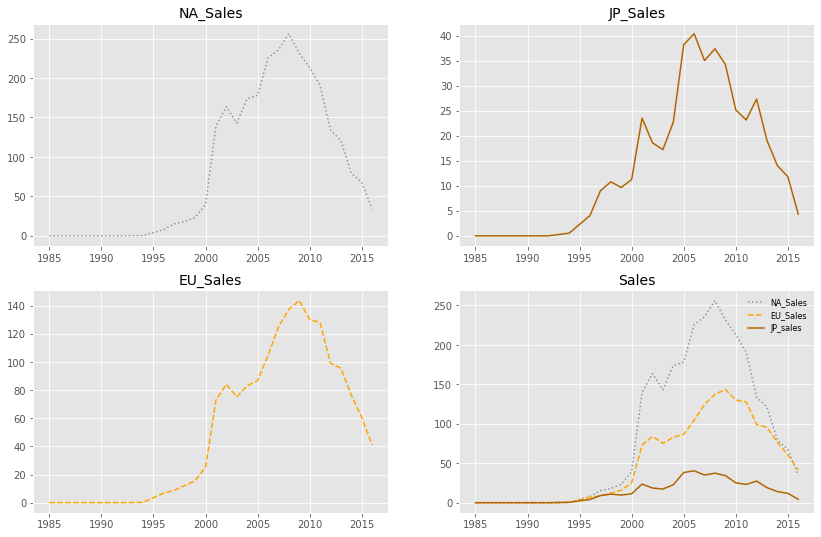

In [15]:
## Your code

# Starting a dataframe
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
gb = sales_df.groupby('Year_of_Release').sum().reset_index()

fig, ax= plt.subplots(2, 2, figsize=(14,9))


ax[0][0].plot(gb.Year_of_Release, gb.NA_Sales, color='#8c92ac', ls = ':')
ax[0][0].set_title('NA_Sales', fontsize=14)

ax[1][0].plot(gb.Year_of_Release, gb.EU_Sales, color='#ffa500', ls = '--')
ax[1][0].set_title('EU_Sales', fontsize = 14)

ax[0][1].plot(gb.Year_of_Release, gb.JP_Sales, color='#b06500', ls = '-'); 
ax[0][1].set_title('JP_Sales', fontsize = 14)

ax[1][1].plot(gb.Year_of_Release, gb.NA_Sales, label = 'NA_Sales', color='#8c92ac', ls = ':')
ax[1][1].plot(gb.Year_of_Release, gb.EU_Sales, label = 'EU_Sales', color='#ffa500', ls = '--')
ax[1][1].plot(gb.Year_of_Release, gb.JP_Sales, label = 'JP_sales', color='#b06500', ls = '-')
ax[1][1].set_title('Sales', fontsize = 14)
ax[1][1].legend(loc=1, fontsize=8, frameon=False);

## 2. Graphs for categorical variables

**Let's look at the number of games for each year using a bar chart:**

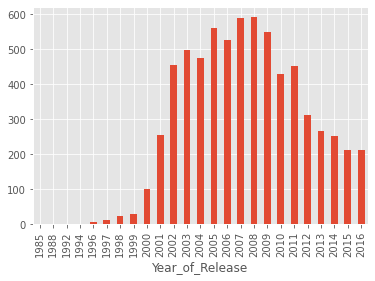

In [16]:
df.groupby('Year_of_Release').Name.count().plot(kind='bar');

**Let's look separately at the number of games of the Sports and Action genre over the past 5 years. Let's make a double diagram and expand it horizontally**

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


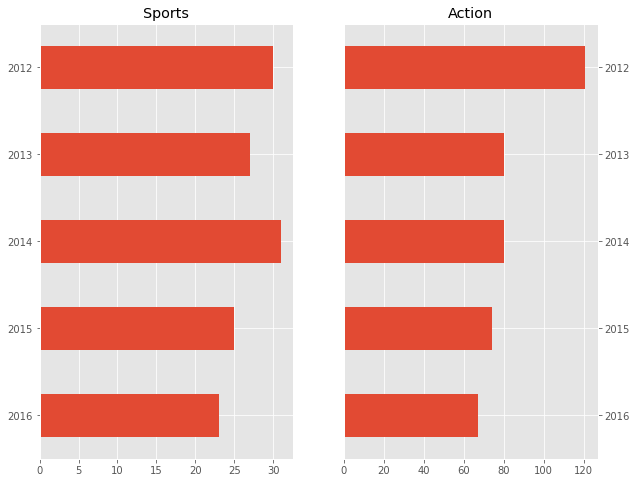

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

gb_sports = df[df.Genre=='Sports'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_sports.plot(kind='barh', ax=ax[0])
ax[0].set_title('Sports')

gb_act = df[df.Genre=='Action'].groupby('Year_of_Release').Name.count().tail(5).sort_index(ascending=False)
gb_act.plot(kind='barh', ax=ax[1])
ax[1].set_title('Action')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # removing the signature to the scale, which is generated automatically

Think about what's wrong with such a schedule?

### Task #3:

Use two vertical bar charts to display the average score of critics and users of games of various ratings.

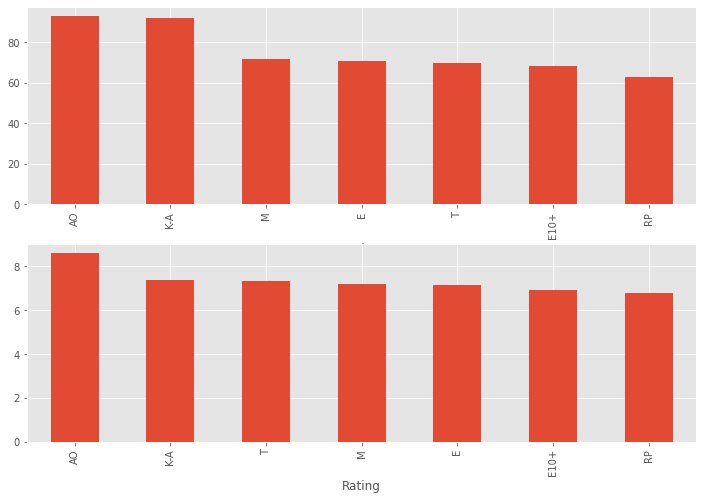

In [18]:
## Your code
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

gb = df.groupby('Rating')[['Critic_Score', 'User_Score']].mean()

gb['Critic_Score'].sort_values(ascending=False).plot(kind='bar', ax=ax[0])
gb['User_Score'].sort_values(ascending=False).plot(kind='bar', ax=ax[1]);

### Task #4:

In the form of a horizontal bar chart, output the top 5 developers with the highest average rating from critics. Next to it, display a diagram of their most successful game by total sales.

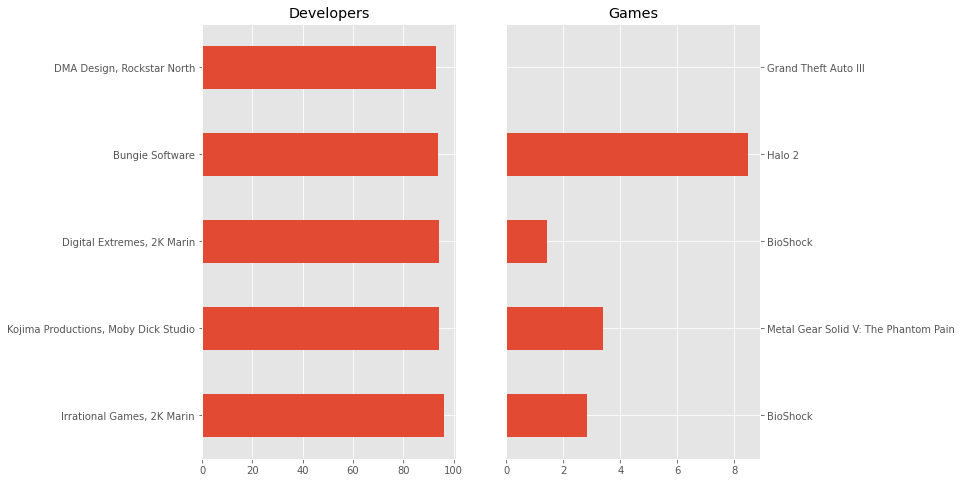

In [19]:
## Your code
gb = df.groupby('Developer').agg({'Critic_Score' : np.mean, 'Global_Sales': np.max}). \
                                    sort_values(by = 'Critic_Score',ascending=False).head(5).reset_index()
gb = pd.merge(gb, df[['Developer', 'Global_Sales', 'Name']], on=['Developer', 'Global_Sales'])


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

gb.set_index('Developer').Critic_Score.plot(kind='barh', ax=ax[0])
ax[0].set_title('Developers')

gb.set_index('Name').Global_Sales.plot(kind='barh', ax=ax[1])
ax[1].set_title('Games')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False)

# removing the signature to the scale, which is generated automatically

### Task #5:

Compare the ratings of games from critics for the top 5 largest gaming platforms (by number of games) using boxplot from the seaborn package.

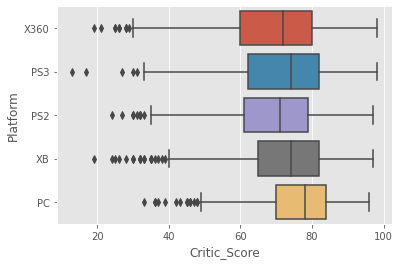

In [20]:
## Your code
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h");

## 3*. Multivariate scattering graph

Now we will work with a data set that contains information about the number of crimes in the US states in 2005.

In [21]:
crimes = pd.read_csv('data/crimeRatesByState2005.tsv', sep='\t')
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


The scatter plot (scatterplot) $-$ is a graph with continuous variables on the _x_ and _y_ axes. The graph consists of points, each of which is responsible for its own observation.

Let's look at the graph of the dependence of murders on burglary (burglary)

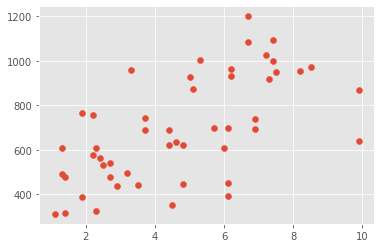

In [22]:
fig, ax = plt.subplots() 
ax.scatter(crimes['murder'], crimes['burglary']);

Here, each point is responsible for its own staff. On the _x_ axis, we see how many murders there were in the state, and on the _y_ axis, how many burglaries

Let's try to add additional information to the graph, for example, as the point size we denote the number of population

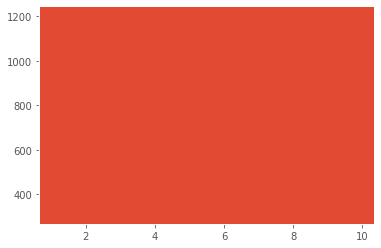

In [23]:
fig, ax = plt.subplots()

# add the parameter s (size) and say which variable will be responsible for it
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']);

The population size is so large that the point has captured the entire coordinate area. Let's try to scale our variable - the relative sizes of states relative to each other are important to us, not absolute values. We also choose the scaling values experimentally: what looks better and is more informative.

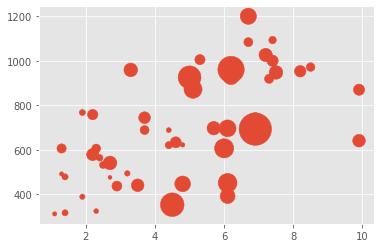

In [24]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000);

Great, but the next problem is merging the dots. Let's add a transparency parameter so that you can see where they overlap.

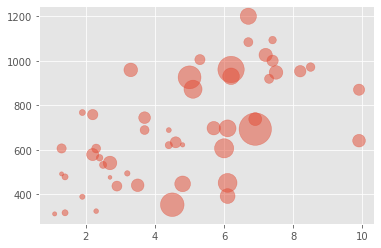

In [25]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5);

Now let's add some other variable (for example, robbery) and shove it into the color parameter

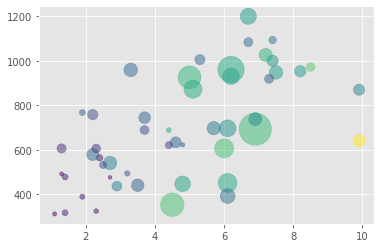

In [26]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, 
           c = crimes['Robbery']); # set a new argument, c (color) and assign it the value of the variable

It remains to find out what color means. To do this, save the graph to a variable and pass it as an argument to the `colorbar()' function. We can also change the color scale using the c map argument.

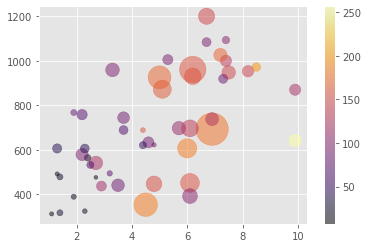

In [27]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, cmap = 'inferno',
           c = crimes['Robbery'])
plt.colorbar(color_graph);

The last thing we'll do here is sign the states

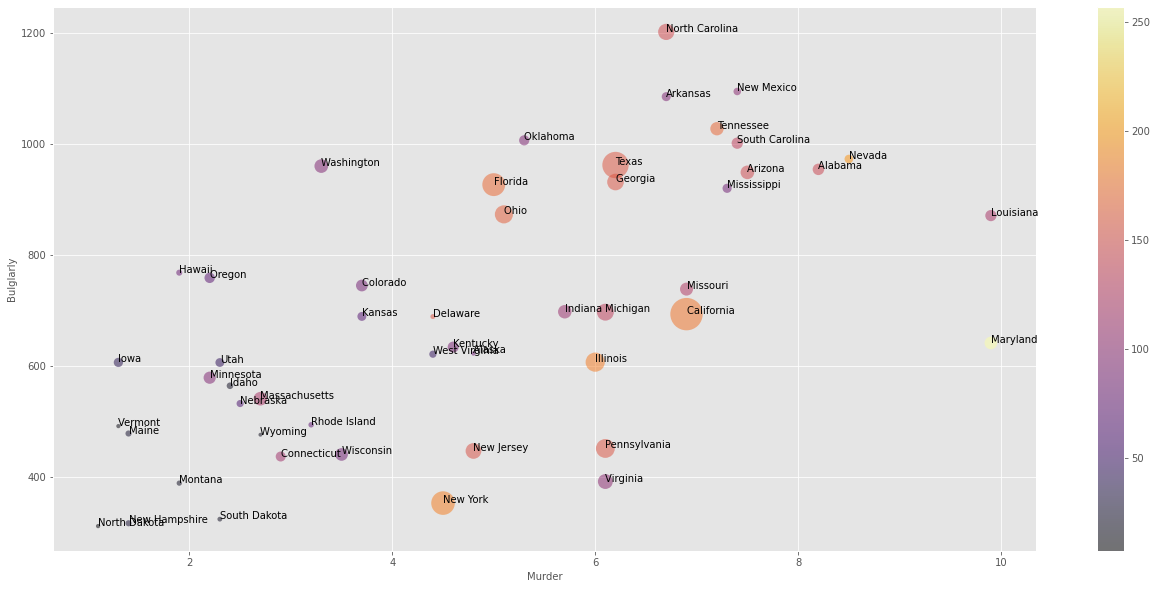

In [28]:
fig, ax = plt.subplots(figsize = (22,10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, 
                         c = crimes['Robbery'], cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel('Murder', fontsize = 10)
ax.set_ylabel('Bulglarly', fontsize = 10)

for i, state in enumerate(crimes['state']):  # using enumerate, we create an index - state name tuple object from columns with state names.
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize = 10) 

# we use the annotate method, which we tell that we need to take the name of the state
# from the tuple that was created using enumerate, and the coordinates of the signature are set using
# the values of our variables x and y for the desired index from the enumerate object (refers to the desired
# row in dataframe)
                
plt.colorbar(color_graph);